In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# 数据导入
dataset = pd.read_csv(r"D:\Codes\data\gender_classification_v7.csv")
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [35]:
# 数据清洗
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [36]:
# 去空
dataset.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [37]:
# 去重
dataset.duplicated().sum()

1768

In [38]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [39]:
# 去越界值
dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [40]:
# 去无用值
dataset.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [41]:
# 数据预处理
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
import pickle
data = dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 227.3+ KB


In [42]:
# 数值化定类离散数据
data['gender'] = data['gender'].map({
    'Male': 1,
    'Female': 0
})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 227.3 KB


<Axes: >

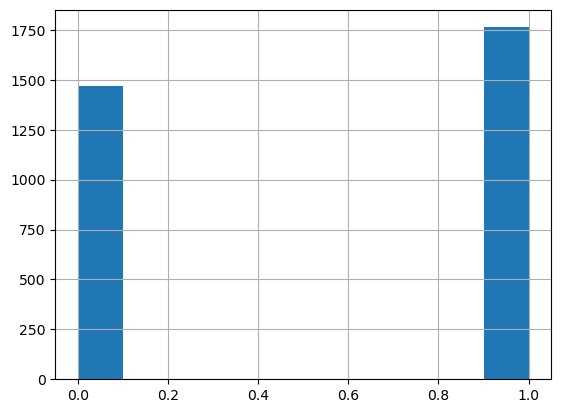

In [31]:
# 查看各维度的分布
data['distance_nose_to_lip_long'].hist()

In [43]:
# 标准化连续数据
features_std = []
features_minmax = ['forehead_width_cm', 'forehead_height_cm']
scaler_minmax = MinMaxScaler()
data[features_minmax] = scaler_minmax.fit_transform(data[features_minmax])
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,0.443219,0.433019,0.536344,0.557686,0.538509,0.545314,0.551500
std,0.382188,0.272193,0.274895,0.498755,0.496738,0.498592,0.498019,0.497418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.219512,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.439024,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.658537,0.650000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# 分割训练数据集和测试数据集
X = data.drop('gender', axis=1)
y = data['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2263, 7), (970, 7), (2263,), (970,))

In [45]:
# 训练数据集重采样平衡不同标签样本数
X0 = X_train[y_train == 0]
y0 = y_train[y_train == 0]
X1 = X_train[y_train == 1]
y1 = y_train[y_train == 1]
X0 = resample(X0, n_samples=len(y1), random_state=7)
y0 = resample(y0, n_samples=len(y1), random_state=7)
X_train = pd.concat([X0, X1])
y_train = pd.concat([y0, y1])
X_train.shape, y_train.shape

((2496, 7), (2496,))

In [46]:
# 数据建模
# 分类模型选择
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

clfs = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=13),
    LogisticRegression(random_state=7),
    SVC(random_state=7, probability=True),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(random_state=7),
    XGBClassifier(),
]

for i, clf in enumerate(clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(str(i)+'-'*60)
    class_report = classification_report(y_test, y_pred)
    print(class_report)

0------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       435
           1       0.98      0.96      0.97       535

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970

1------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       435
           1       0.96      0.93      0.95       535

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970

2------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       435
           1       0.95      0.96      0.95       5

In [74]:
# # 模型优化
# param_grid = {
#     'n_neighbors': [9, 13, 15],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }

# clf = GaussianNB()
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)
# print('Best parameters found:', grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'distance'}


In [47]:
# clf_best = grid_search.best_estimator_
clf_best = GaussianNB()
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

In [48]:
# 模型评估
# acc precision recall f1
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       435
           1       0.98      0.96      0.97       535

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



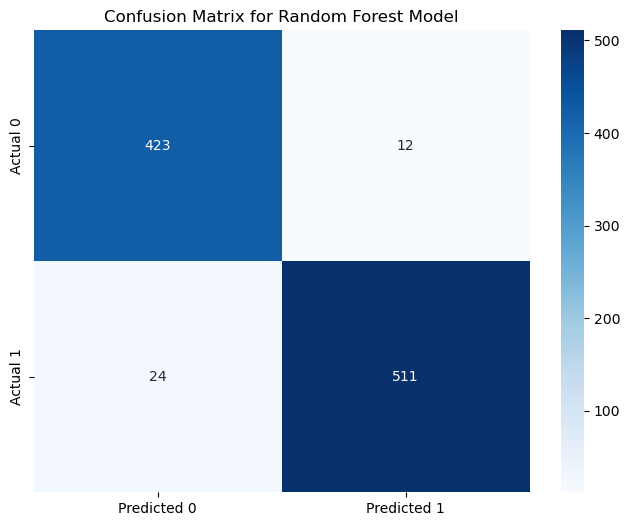

In [49]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

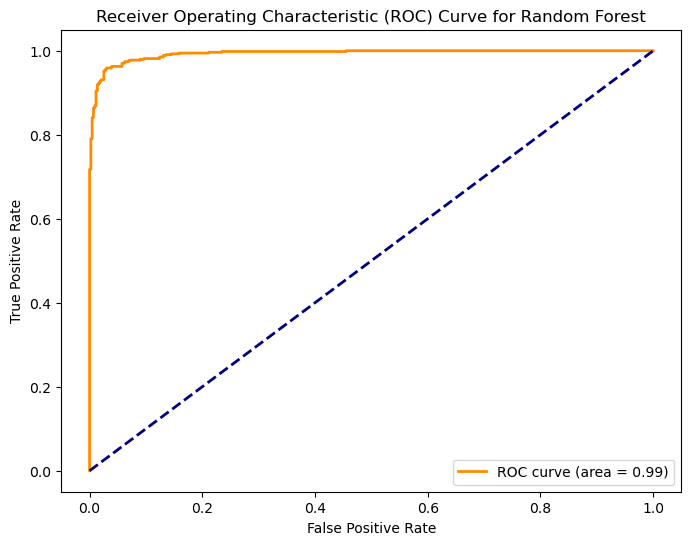

In [50]:
# roc曲线 auc
fpr, tpr, _ = roc_curve(y_test, clf_best.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [51]:
# 模型保存
with open('model.pkl', 'wb') as f:
    pickle.dump(clf_best, f)